In [1]:
!wget http://www.ivan-sipiran.com/downloads/SSD.zip
!unzip SSD.zip

--2022-10-12 15:03:58--  http://www.ivan-sipiran.com/downloads/SSD.zip
Resolving www.ivan-sipiran.com (www.ivan-sipiran.com)... 66.96.149.31
Connecting to www.ivan-sipiran.com (www.ivan-sipiran.com)|66.96.149.31|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23927304 (23M) [application/zip]
Saving to: ‘SSD.zip’

SSD.zip             100%[===================>]  22.82M  28.2MB/s    in 0.8s    

2022-10-12 15:04:00 (28.2 MB/s) - ‘SSD.zip’ saved [23927304/23927304]

Archive:  SSD.zip
  inflating: Intersection-Counts.jpg  
  inflating: MobileNetSSD_deploy.caffemodel  
  inflating: MobileNetSSD_deploy.prototxt  
  inflating: olympic-trials.jpg      
  inflating: blueangels.jpg          


In [2]:
import numpy as np
import argparse
import imutils
import time
import cv2
import matplotlib.pyplot as plt
import imutils

In [3]:
net = cv2.dnn.readNetFromCaffe('MobileNetSSD_deploy.prototxt', 'MobileNetSSD_deploy.caffemodel')

CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat",
	"bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
	"dog", "horse", "motorbike", "person", "pottedplant", "sheep",
	"sofa", "train", "tvmonitor"]

In [10]:
img = cv2.imread('traffic.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = imutils.resize(img, width=1500)
(H,W)=img.shape[:2]

blob = cv2.dnn.blobFromImage(img, 0.007843, (W,H), 127.5)
net.setInput(blob)
detections = net.forward()
rects=[]

In [11]:
for i in range(0, detections.shape[2]):
  if detections[0, 0, i, 2] > 0.1:
    box = detections[0, 0, i, 3:7] * np.array([W, H, W, H])
    rects.append(box.astype("int"))
    (startX, startY, endX, endY) = box.astype("int")
    cv2.rectangle(img, (startX, startY), (endX, endY), (0, 255, 0), 2)

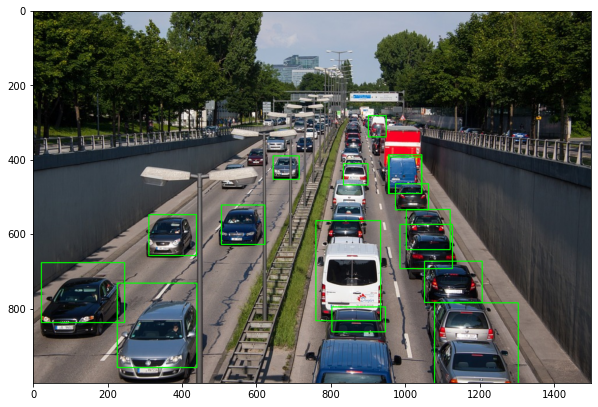

In [12]:
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [9]:
!wget https://www.wsha.org/wp-content/uploads/banner-diverse-group-of-people-2.jpg -O people.jpg
!wget https://cdn.pixabay.com/photo/2013/07/05/01/08/traffic-143391_960_720.jpg -O traffic.jpg

--2022-10-12 15:05:07--  https://www.wsha.org/wp-content/uploads/banner-diverse-group-of-people-2.jpg
Resolving www.wsha.org (www.wsha.org)... 141.193.213.10, 141.193.213.11
Connecting to www.wsha.org (www.wsha.org)|141.193.213.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1718649 (1.6M) [image/jpeg]
Saving to: ‘people.jpg’

people.jpg          100%[===================>]   1.64M  --.-KB/s    in 0.01s   

2022-10-12 15:05:07 (172 MB/s) - ‘people.jpg’ saved [1718649/1718649]

--2022-10-12 15:05:07--  https://cdn.pixabay.com/photo/2013/07/05/01/08/traffic-143391_960_720.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 172.64.150.12, 104.18.37.244, 2606:4700:4400::6812:25f4, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|172.64.150.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 259865 (254K) [binary/octet-stream]
Saving to: ‘traffic.jpg’

traffic.jpg         100%[===================>] 253.77K  --.-KB/s    in 0.01s   

2022